# Machine Problem No. 2: Evaluating Machine Learning Model Performance

**Course:** CSST102 - Basic Machine Learning  
**Topic:** Evaluating Machine Learning Model Performance Using Logistic Regression

---

## Objectives
1. Apply data preprocessing, train-test split, and model training techniques
2. Implement logistic regression for classification tasks
3. Evaluate model performance using confusion matrix and learning curves
4. Apply 5-fold cross-validation to validate model reliability
5. Interpret and communicate model results accurately

## 1. Import Required Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)

# For optional challenge - additional classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Dataset Selection & Loading

We will use the **Breast Cancer Wisconsin Dataset** from scikit-learn. This dataset contains:
- 569 samples with 30 features
- Binary classification: Malignant (0) vs Benign (1)
- Features are computed from digitized images of fine needle aspirate (FNA) of breast mass

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame for better exploration
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic information
print("=" * 60)
print("BREAST CANCER WISCONSIN DATASET")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Features: {len(data.feature_names)}")
print(f"Number of Samples: {len(df)}")
print(f"\nTarget Classes:")
print(f"  - {data.target_names[0]} (0): Malignant tumor")
print(f"  - {data.target_names[1]} (1): Benign tumor")

BREAST CANCER WISCONSIN DATASET

Dataset Shape: (569, 31)
Number of Features: 30
Number of Samples: 569

Target Classes:
  - malignant (0): Malignant tumor
  - benign (1): Benign tumor


In [3]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Statistical summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 3. Data Preparation

### 3.1 Check for Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print("-" * 40)

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

Missing Values per Column:
----------------------------------------
✓ No missing values found in the dataset!


### 3.2 Target Distribution


Target Distribution:
----------------------------------------
Benign (1): 357 samples (62.7%)
Malignant (0): 212 samples (37.3%)


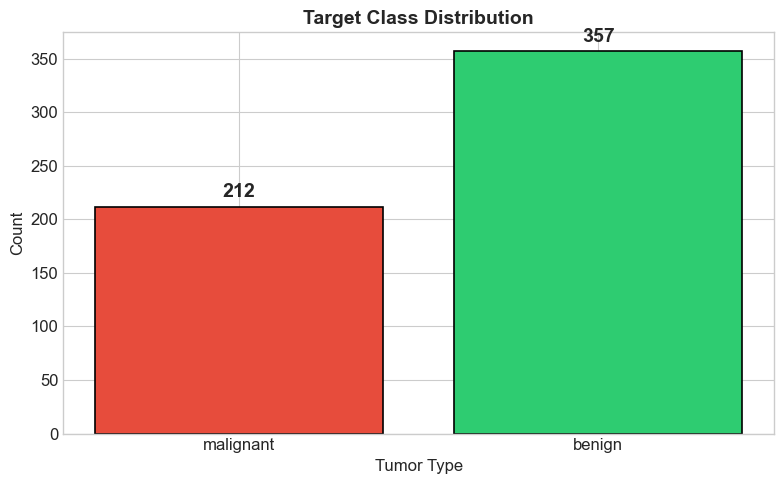

In [6]:
# Analyze target distribution
target_counts = df['target'].value_counts()
print("\nTarget Distribution:")
print("-" * 40)
for idx, count in target_counts.items():
    label = data.target_names[idx]
    percentage = (count / len(df)) * 100
    print(f"{label.capitalize()} ({idx}): {count} samples ({percentage:.1f}%)")

# Visualize target distribution
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#e74c3c', '#2ecc71']  # Red for malignant, Green for benign
bars = ax.bar(data.target_names, target_counts.sort_index(), color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, count in zip(bars, target_counts.sort_index()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
            f'{count}', ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_xlabel('Tumor Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Target Class Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.3 Feature Preparation & Standardization

In [7]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features using StandardScaler
# This is important for Logistic Regression to converge properly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✓ Features have been standardized (mean=0, std=1)")
print(f"\nScaled data statistics:")
print(f"  Mean: {X_scaled.mean():.6f} (should be ~0)")
print(f"  Std:  {X_scaled.std():.6f} (should be ~1)")

Features shape: (569, 30)
Target shape: (569,)

✓ Features have been standardized (mean=0, std=1)

Scaled data statistics:
  Mean: -0.000000 (should be ~0)
  Std:  1.000000 (should be ~1)


## 4. Train-Test Split

Split the dataset into 80% training and 20% testing sets.

In [8]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.20, 
    random_state=42,
    stratify=y  # Maintain class distribution in both sets
)

print("Train-Test Split Results:")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

print("\nClass distribution in training set:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    print(f"  {data.target_names[idx]}: {count} ({count/len(y_train)*100:.1f}%)")

print("\nClass distribution in testing set:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_dist.items():
    print(f"  {data.target_names[idx]}: {count} ({count/len(y_test)*100:.1f}%)")

Train-Test Split Results:
Training set: 455 samples (80%)
Testing set:  114 samples (20%)

Class distribution in training set:
  malignant: 170 (37.4%)
  benign: 285 (62.6%)

Class distribution in testing set:
  malignant: 42 (36.8%)
  benign: 72 (63.2%)


## 5. Model Building - Logistic Regression

Train a Logistic Regression classifier and evaluate its performance.

In [9]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,      # Maximum iterations for solver convergence
    random_state=42,
    solver='lbfgs'      # Recommended solver for this dataset size
)

# Fit the model on training data
log_reg.fit(X_train, y_train)

print("✓ Logistic Regression model trained successfully!")
print(f"\nModel Parameters:")
print(f"  - Solver: {log_reg.solver}")
print(f"  - Max Iterations: {log_reg.max_iter}")
print(f"  - Regularization (C): {log_reg.C}")

✓ Logistic Regression model trained successfully!

Model Parameters:
  - Solver: lbfgs
  - Max Iterations: 1000
  - Regularization (C): 1.0


In [10]:
# Evaluate model accuracy on training and testing sets
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print("\nModel Accuracy Evaluation:")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Check for overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"\nAccuracy Difference: {accuracy_diff:.4f}")
if accuracy_diff > 0.05:
    print("⚠ Warning: Potential overfitting detected")
else:
    print("✓ Model generalizes well (no significant overfitting)")


Model Accuracy Evaluation:
Training Accuracy: 0.9890 (98.90%)
Testing Accuracy:  0.9825 (98.25%)

Accuracy Difference: 0.0066
✓ Model generalizes well (no significant overfitting)


## 6. Cross-Validation (5-Fold)

Apply 5-Fold Cross Validation to validate model reliability and get a more robust performance estimate.

In [11]:
# Perform 5-Fold Cross Validation
cv_scores = cross_val_score(
    log_reg, 
    X_scaled,  # Use full scaled dataset for CV
    y, 
    cv=5,      # 5-fold cross validation
    scoring='accuracy'
)

# Calculate statistics
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("5-Fold Cross Validation Results:")
print("=" * 50)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f} ({score*100:.2f}%)")

print("\n" + "-" * 50)
print(f"Mean Accuracy: {cv_mean:.4f} ({cv_mean*100:.2f}%)")
print(f"Standard Deviation: {cv_std:.4f} ({cv_std*100:.2f}%)")
print(f"\n95% Confidence Interval: {cv_mean:.4f} ± {1.96*cv_std:.4f}")
print(f"                         [{cv_mean - 1.96*cv_std:.4f} - {cv_mean + 1.96*cv_std:.4f}]")

5-Fold Cross Validation Results:
Fold 1: 0.9825 (98.25%)
Fold 2: 0.9825 (98.25%)
Fold 3: 0.9737 (97.37%)
Fold 4: 0.9737 (97.37%)
Fold 5: 0.9912 (99.12%)

--------------------------------------------------
Mean Accuracy: 0.9807 (98.07%)
Standard Deviation: 0.0065 (0.65%)

95% Confidence Interval: 0.9807 ± 0.0128
                         [0.9679 - 0.9935]


In [12]:
# Save cross-validation results to file
cv_results_text = """5-Fold Cross Validation Results
================================
Dataset: Breast Cancer Wisconsin
Model: Logistic Regression

Individual Fold Scores:
"""
for i, score in enumerate(cv_scores, 1):
    cv_results_text += f"  Fold {i}: {score:.4f} ({score*100:.2f}%)\n"

cv_results_text += f"""
Summary Statistics:
  Mean Accuracy: {cv_mean:.4f} ({cv_mean*100:.2f}%)
  Standard Deviation: {cv_std:.4f} ({cv_std*100:.2f}%)
  95% Confidence Interval: [{cv_mean - 1.96*cv_std:.4f} - {cv_mean + 1.96*cv_std:.4f}]

Interpretation:
  The low standard deviation indicates consistent model performance
  across different data subsets, suggesting good generalization.
"""

# Save to file
with open('cross_validation.txt', 'w') as f:
    f.write(cv_results_text)

print("✓ Cross-validation results saved to 'cross_validation.txt'")

✓ Cross-validation results saved to 'cross_validation.txt'


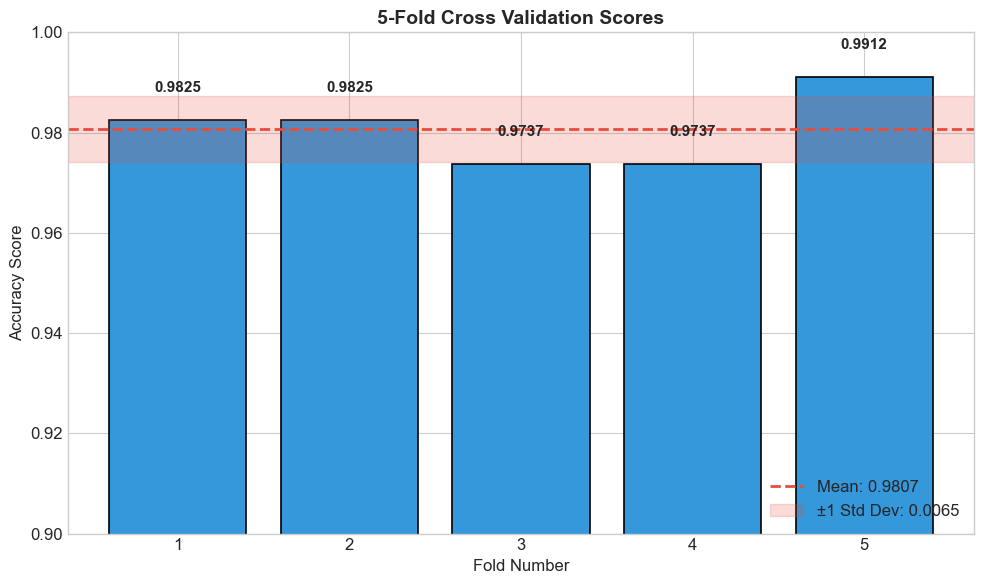

In [13]:
# Visualize cross-validation scores
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for each fold
bars = ax.bar(range(1, 6), cv_scores, color='#3498db', edgecolor='black', linewidth=1.2)

# Add mean line
ax.axhline(y=cv_mean, color='#e74c3c', linestyle='--', linewidth=2, label=f'Mean: {cv_mean:.4f}')

# Add ±1 std shading
ax.axhspan(cv_mean - cv_std, cv_mean + cv_std, alpha=0.2, color='#e74c3c', label=f'±1 Std Dev: {cv_std:.4f}')

# Add value labels on bars
for bar, score in zip(bars, cv_scores):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{score:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Fold Number', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('5-Fold Cross Validation Scores', fontsize=14, fontweight='bold')
ax.set_ylim([0.90, 1.0])
ax.set_xticks(range(1, 6))
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 7. Model Evaluation - Confusion Matrix

Generate predictions on test data and create a confusion matrix with detailed metrics.

In [14]:
# Generate predictions on test data
y_pred = log_reg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print("=" * 50)
print(f"\n{cm}\n")

# Detailed breakdown
tn, fp, fn, tp = cm.ravel()
print("Breakdown:")
print(f"  True Negatives (TN):  {tn} - Correctly predicted Malignant")
print(f"  False Positives (FP): {fp} - Malignant predicted as Benign")
print(f"  False Negatives (FN): {fn} - Benign predicted as Malignant")
print(f"  True Positives (TP):  {tp} - Correctly predicted Benign")

Confusion Matrix:

[[41  1]
 [ 1 71]]

Breakdown:
  True Negatives (TN):  41 - Correctly predicted Malignant
  False Positives (FP): 1 - Malignant predicted as Benign
  False Negatives (FN): 1 - Benign predicted as Malignant
  True Positives (TP):  71 - Correctly predicted Benign


In [15]:
# Calculate and display all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Metrics:")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

print("\n" + "-" * 50)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Metrics:
Accuracy:  0.9825 (98.25%)
Precision: 0.9861 (98.61%)
Recall:    0.9861 (98.61%)
F1-Score:  0.9861 (98.61%)

--------------------------------------------------

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



✓ Confusion matrix saved to 'confusion_matrix.png'


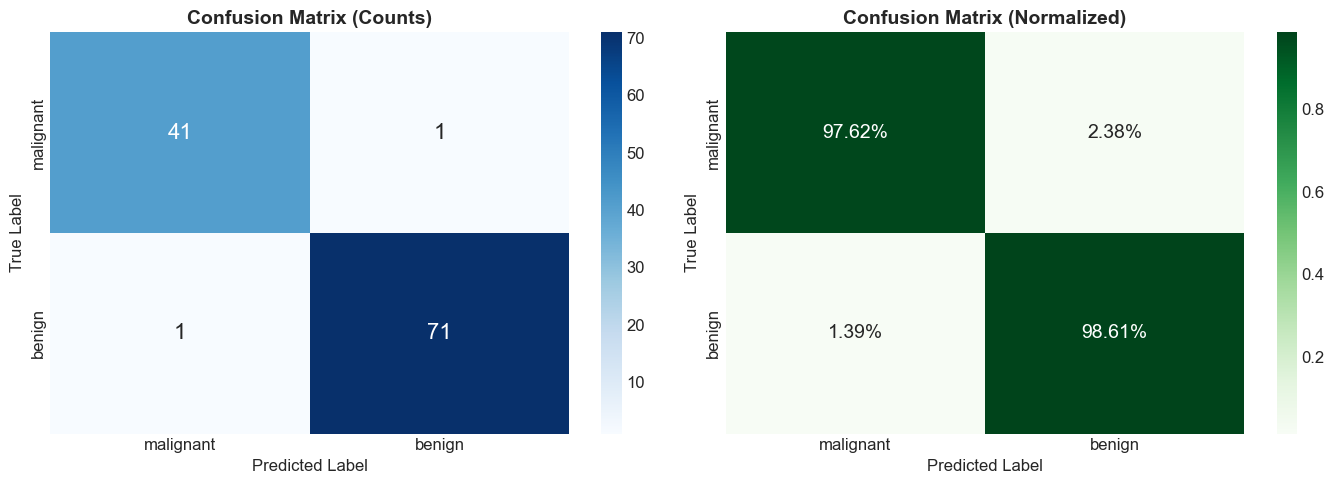

In [16]:
# Visualize confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, yticklabels=data.target_names,
            ax=axes[0], annot_kws={'size': 16})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Plot 2: Normalized (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', 
            xticklabels=data.target_names, yticklabels=data.target_names,
            ax=axes[1], annot_kws={'size': 14})
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight', facecolor='white')
print("✓ Confusion matrix saved to 'confusion_matrix.png'")
plt.show()

## 8. Learning Curve Visualization

Plot a learning curve to analyze whether the model is overfitting, underfitting, or well-fitted.

In [17]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    log_reg,
    X_scaled,
    y,
    cv=5,
    n_jobs=-1,  # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different training set sizes
    scoring='accuracy',
    random_state=42
)

# Calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

print("Learning Curve Data Generated:")
print(f"  Training sizes: {train_sizes}")

Learning Curve Data Generated:
  Training sizes: [ 45  91 136 182 227 273 318 364 409 455]


✓ Learning curve saved to 'learning_curve.png'


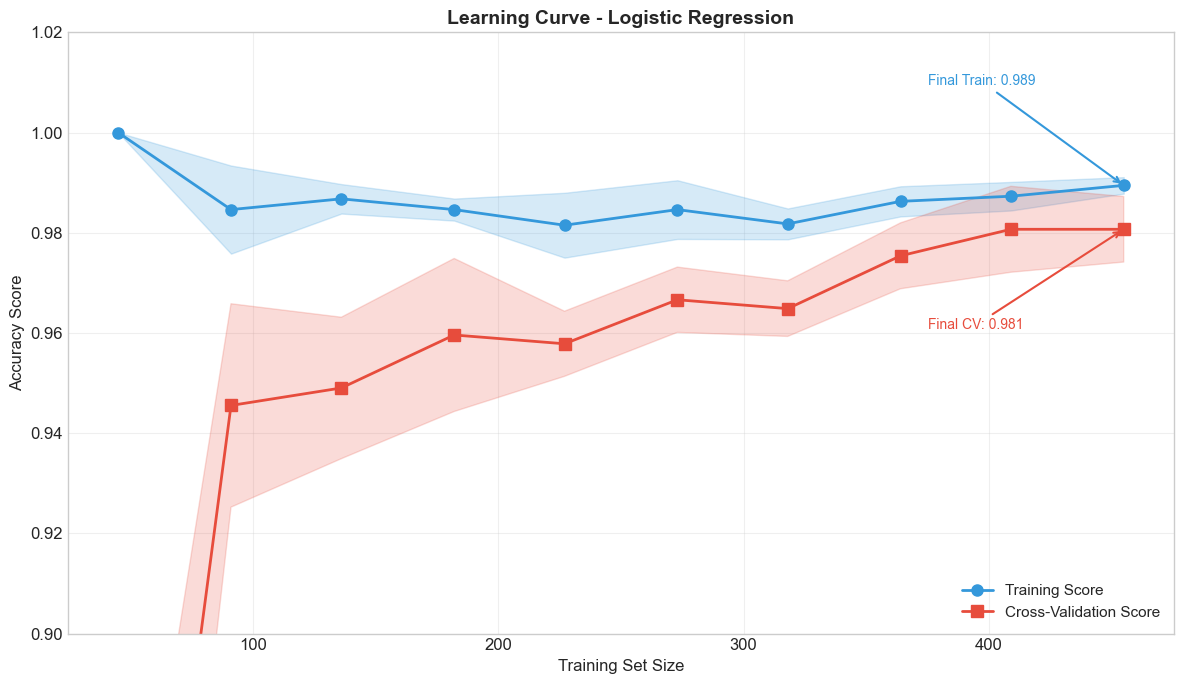

In [18]:
# Plot learning curve
fig, ax = plt.subplots(figsize=(12, 7))

# Plot training scores
ax.plot(train_sizes, train_mean, 'o-', color='#3498db', linewidth=2, 
        markersize=8, label='Training Score')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                alpha=0.2, color='#3498db')

# Plot validation/test scores
ax.plot(train_sizes, test_mean, 's-', color='#e74c3c', linewidth=2, 
        markersize=8, label='Cross-Validation Score')
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, 
                alpha=0.2, color='#e74c3c')

# Customize plot
ax.set_xlabel('Training Set Size', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Learning Curve - Logistic Regression', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.set_ylim([0.90, 1.02])
ax.grid(True, alpha=0.3)

# Add annotation for final scores
ax.annotate(f'Final Train: {train_mean[-1]:.3f}', 
            xy=(train_sizes[-1], train_mean[-1]),
            xytext=(train_sizes[-1] - 80, train_mean[-1] + 0.02),
            fontsize=10, color='#3498db',
            arrowprops=dict(arrowstyle='->', color='#3498db', lw=1.5))

ax.annotate(f'Final CV: {test_mean[-1]:.3f}', 
            xy=(train_sizes[-1], test_mean[-1]),
            xytext=(train_sizes[-1] - 80, test_mean[-1] - 0.02),
            fontsize=10, color='#e74c3c',
            arrowprops=dict(arrowstyle='->', color='#e74c3c', lw=1.5))

plt.tight_layout()
plt.savefig('learning_curve.png', dpi=150, bbox_inches='tight', facecolor='white')
print("✓ Learning curve saved to 'learning_curve.png'")
plt.show()

In [19]:
# Analyze the learning curve
print("Learning Curve Analysis:")
print("=" * 50)

gap = train_mean[-1] - test_mean[-1]
print(f"\nFinal Training Score: {train_mean[-1]:.4f}")
print(f"Final Validation Score: {test_mean[-1]:.4f}")
print(f"Gap (Train - Val): {gap:.4f}")

print("\nDiagnosis:")
if gap > 0.1:
    print("⚠ HIGH VARIANCE (Overfitting)")
    print("  - Training score is much higher than validation score")
    print("  - Consider: more data, regularization, or simpler model")
elif train_mean[-1] < 0.85 and test_mean[-1] < 0.85:
    print("⚠ HIGH BIAS (Underfitting)")
    print("  - Both scores are relatively low")
    print("  - Consider: more features, complex model, or less regularization")
else:
    print("✓ WELL-FITTED MODEL")
    print("  - Training and validation scores converge at high values")
    print("  - The small gap indicates good generalization")
    print("  - The model achieves a good bias-variance tradeoff")

Learning Curve Analysis:

Final Training Score: 0.9895
Final Validation Score: 0.9807
Gap (Train - Val): 0.0088

Diagnosis:
✓ WELL-FITTED MODEL
  - Training and validation scores converge at high values
  - The small gap indicates good generalization
  - The model achieves a good bias-variance tradeoff


## 9. Optional Challenge: Comparing with Other Classifiers (+10 pts)

Compare Logistic Regression with Decision Tree, KNN, and SVM classifiers.

In [20]:
# Define classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42)
}

# Compare using cross-validation
comparison_results = {}

print("Classifier Comparison (5-Fold Cross Validation):")
print("=" * 60)

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
    comparison_results[name] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"\n{name}:")
    print(f"  Mean Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"  Fold Scores: {[f'{s:.4f}' for s in scores]}")

Classifier Comparison (5-Fold Cross Validation):

Logistic Regression:
  Mean Accuracy: 0.9807 ± 0.0065
  Fold Scores: ['0.9825', '0.9825', '0.9737', '0.9737', '0.9912']

Decision Tree:
  Mean Accuracy: 0.9173 ± 0.0242
  Fold Scores: ['0.9123', '0.9035', '0.9298', '0.9561', '0.8850']



K-Nearest Neighbors:
  Mean Accuracy: 0.9649 ± 0.0096
  Fold Scores: ['0.9649', '0.9561', '0.9825', '0.9561', '0.9646']

Support Vector Machine:
  Mean Accuracy: 0.9736 ± 0.0147
  Fold Scores: ['0.9737', '0.9561', '1.0000', '0.9649', '0.9735']


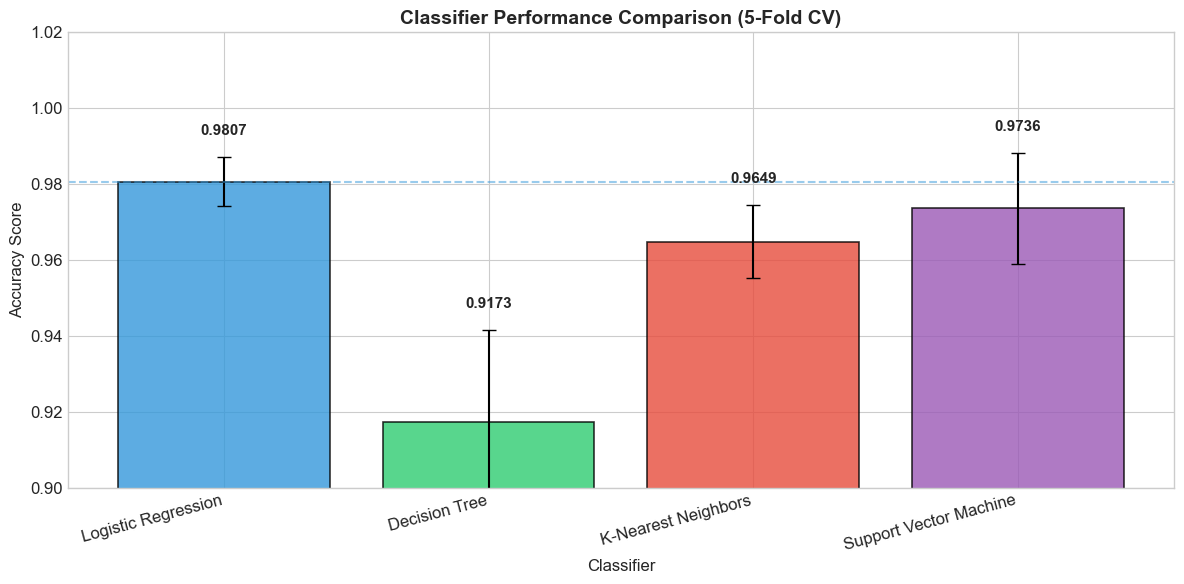

In [21]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

names = list(comparison_results.keys())
means = [comparison_results[n]['mean'] for n in names]
stds = [comparison_results[n]['std'] for n in names]

# Create bar plot with error bars
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
bars = ax.bar(names, means, yerr=stds, capsize=5, color=colors, 
              edgecolor='black', linewidth=1.2, alpha=0.8)

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.005, 
            f'{mean:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Classifier', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Classifier Performance Comparison (5-Fold CV)', fontsize=14, fontweight='bold')
ax.set_ylim([0.90, 1.02])
ax.axhline(y=comparison_results['Logistic Regression']['mean'], color='#3498db', 
           linestyle='--', alpha=0.5, label='Logistic Regression baseline')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Determine the best classifier
best_classifier = max(comparison_results.items(), key=lambda x: x[1]['mean'])

print("\n" + "=" * 60)
print("COMPARISON SUMMARY")
print("=" * 60)

# Sort by mean accuracy
sorted_results = sorted(comparison_results.items(), key=lambda x: x[1]['mean'], reverse=True)

print("\nRanking (by Mean Accuracy):")
for rank, (name, result) in enumerate(sorted_results, 1):
    emoji = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{emoji} {rank}. {name}: {result['mean']:.4f} (±{result['std']:.4f})")

print(f"\n✓ Best Performer: {best_classifier[0]}")
print(f"  Mean Accuracy: {best_classifier[1]['mean']:.4f}")

# Performance difference from Logistic Regression
lr_mean = comparison_results['Logistic Regression']['mean']
print(f"\nComparison to Logistic Regression:")
for name, result in comparison_results.items():
    if name != 'Logistic Regression':
        diff = result['mean'] - lr_mean
        symbol = '+' if diff > 0 else ''
        print(f"  {name}: {symbol}{diff:.4f} ({symbol}{diff*100:.2f}%)")


COMPARISON SUMMARY

Ranking (by Mean Accuracy):
🥇 1. Logistic Regression: 0.9807 (±0.0065)
🥈 2. Support Vector Machine: 0.9736 (±0.0147)
🥉 3. K-Nearest Neighbors: 0.9649 (±0.0096)
   4. Decision Tree: 0.9173 (±0.0242)

✓ Best Performer: Logistic Regression
  Mean Accuracy: 0.9807

Comparison to Logistic Regression:
  Decision Tree: -0.0633 (-6.33%)
  K-Nearest Neighbors: -0.0158 (-1.58%)
  Support Vector Machine: -0.0070 (-0.70%)


## 10. Summary & Conclusions

In [23]:
print("\n" + "=" * 70)
print("MACHINE PROBLEM 2 - SUMMARY")
print("=" * 70)

print("\n📊 Dataset: Breast Cancer Wisconsin")
print(f"   - Samples: {len(df)}")
print(f"   - Features: {len(data.feature_names)}")
print(f"   - Classes: Malignant (0), Benign (1)")

print("\n🔧 Model: Logistic Regression")
print(f"   - Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   - Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n📈 Cross-Validation (5-Fold):")
print(f"   - Mean Accuracy: {cv_mean:.4f} (±{cv_std:.4f})")

print("\n📉 Classification Metrics:")
print(f"   - Accuracy: {accuracy:.4f}")
print(f"   - Precision: {precision:.4f}")
print(f"   - Recall: {recall:.4f}")
print(f"   - F1-Score: {f1:.4f}")

print("\n📁 Generated Files:")
print("   - confusion_matrix.png")
print("   - learning_curve.png")
print("   - cross_validation.txt")

print("\n✅ All tasks completed successfully!")


MACHINE PROBLEM 2 - SUMMARY

📊 Dataset: Breast Cancer Wisconsin
   - Samples: 569
   - Features: 30
   - Classes: Malignant (0), Benign (1)

🔧 Model: Logistic Regression
   - Training Accuracy: 0.9890 (98.90%)
   - Testing Accuracy: 0.9825 (98.25%)

📈 Cross-Validation (5-Fold):
   - Mean Accuracy: 0.9807 (±0.0065)

📉 Classification Metrics:
   - Accuracy: 0.9825
   - Precision: 0.9861
   - Recall: 0.9861
   - F1-Score: 0.9861

📁 Generated Files:
   - confusion_matrix.png
   - learning_curve.png
   - cross_validation.txt

✅ All tasks completed successfully!
